In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig",dpi=100)
from matplotlib import pyplot as plt

import numpy as np
#from numpy import exp, log
np.set_printoptions(precision=3, linewidth = 170)

import numba as nb
###usage
###@nb.jit(nopython = True)

import time

from scipy.optimize import fminbound

#my library
# from FEM_2D import fem2deval_mesh, fem2d_peval

#display options
#jupyter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
@nb.jit(nopython = True)
def shft(a, b, c, d):
    a=b
    b=c
    c=d

In [3]:
a = 1.
b = 2.
c = 3.
d = 4.

In [6]:
epsilon = np.finfo(float).eps
def brent(ax, bx, cx, func, tol=1.0e-8, itmax=500):
    
    #parameters
    CGOLD=0.3819660
    ZEPS=1.0e-3*epsilon
    #*np.finfo(float).eps
    
    brent = 1.0e20
    xmin = 1.0e20
    
    a=min(ax,cx)
    b=max(ax,cx)
    v=bx
    w=v
    x=v
    e=0.0 
    fx=func(x) 
    fv=fx
    fw=fx
    
    d = 0.0
    
    it = 0
    for it in range(itmax):
        
        xm=0.5*(a+b)
        tol1=tol*abs(x)+ZEPS
        tol2=2.0*tol1
        if (abs(x-xm) <= (tol2-0.5*(b-a))):
            xmin=x
            brent=fx
            return xmin, brent
        
        if (abs(e) > tol1):
            r=(x-w)*(fx-fv)
            q=(x-v)*(fx-fw)
            p=(x-v)*q-(x-w)*r
            q=2.0*(q-r)
        
            if (q > 0.0): 
                p=-p
            
            q=abs(q)
            etemp=e
            e=d
            
            if abs(p) >= abs(0.5*q*etemp) or  p <= q*(a-x) or p >= q*(b-x):

                #e=merge(a-x,b-x, x >= xm )
                if x >= xm:
                    e = a-x
                else:
                    e = b-x
                d=CGOLD*e
                
            else:
                d=p/q
                u=x+d
                
                if (u-a < tol2 or b-u < tol2): 
                    d= abs(tol1)*np.sign(xm - x)  #sign(tol1,xm-x)

        else:
            
            if x >= xm:
                e = a-x
            else:
                e = b-x

            d=CGOLD*e
        
        u = 0.  #merge(x+d,x+sign(tol1,d), abs(d) >= tol1 )
        if abs(d) >= tol1:
            u = x+d
        else:
            u = x+abs(tol1)*np.sign(d)
        
        fu = func(u)
        
        if (fu <= fx):
            if (u >= x):
                a=x
            else:
                b=x
                
            #shft(v,w,x,u)
            v = w
            w = x
            x = u
            #shft(fv,fw,fx,fu)
            fv = fw
            fw = fx
            fx = fu
            
            
        else:
            if (u < x):
                a=u
            else:
                b=u

            if fu <= fw or w == x:
                v=w
                fv=fw
                w=u
                fw=fu

            elif fu <= fv or v == x or v == w:
                v=u
                fv=fu
                
    if it == itmax-1:
        print('brent: exceed maximum iterations')

    return x, fx
    
    
#     return xmin, brent

In [7]:
@nb.jit(nopython = True)
def obj(x):
    return np.sin(x)

In [8]:
@nb.jit(nopython = True)
def brent_numba(ax, bx, cx, tol=1.0e-8, itmax=500):
    
    ###put your objective function here
    func = obj
    
    #parameters
    CGOLD=0.3819660
    ZEPS=1.0e-3*epsilon
    #*np.finfo(float).eps
    
    brent = 1.0e20
    xmin = 1.0e20
    
    a=min(ax,cx)
    b=max(ax,cx)
    v=bx
    w=v
    x=v
    e=0.0 
    fx=func(x) 
    fv=fx
    fw=fx
    
    d = 0.0
    
    it = 0
    for it in range(itmax):
        
        xm=0.5*(a+b)
        tol1=tol*abs(x)+ZEPS
        tol2=2.0*tol1
        if (abs(x-xm) <= (tol2-0.5*(b-a))):
            xmin=x
            brent=fx
            return xmin, brent
        
        if (abs(e) > tol1):
            r=(x-w)*(fx-fv)
            q=(x-v)*(fx-fw)
            p=(x-v)*q-(x-w)*r
            q=2.0*(q-r)
        
            if (q > 0.0): 
                p=-p
            
            q=abs(q)
            etemp=e
            e=d
            
            if abs(p) >= abs(0.5*q*etemp) or  p <= q*(a-x) or p >= q*(b-x):

                #e=merge(a-x,b-x, x >= xm )
                if x >= xm:
                    e = a-x
                else:
                    e = b-x
                d=CGOLD*e
                
            else:
                d=p/q
                u=x+d
                
                if (u-a < tol2 or b-u < tol2): 
                    d= abs(tol1)*np.sign(xm - x)  #sign(tol1,xm-x)

        else:
            
            if x >= xm:
                e = a-x
            else:
                e = b-x

            d=CGOLD*e
        
        u = 0.  #merge(x+d,x+sign(tol1,d), abs(d) >= tol1 )
        if abs(d) >= tol1:
            u = x+d
        else:
            u = x+abs(tol1)*np.sign(d)
        
        ###put your objective function also here###
        fu = func(u)
        
        if (fu <= fx):
            if (u >= x):
                a=x
            else:
                b=x
                
            #shft(v,w,x,u)
            v = w
            w = x
            x = u
            #shft(fv,fw,fx,fu)
            fv = fw
            fw = fx
            fx = fu
            
            
        else:
            if (u < x):
                a=u
            else:
                b=u

            if fu <= fw or w == x:
                v=w
                fv=fw
                w=u
                fw=fu

            elif fu <= fv or v == x or v == w:
                v=u
                fv=fu
                
    if it == itmax-1:
        print('brent: exceed maximum iterations')

    return x, fx
    
    
#     return xmin, brent

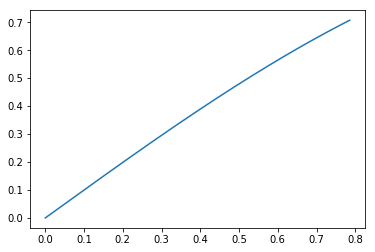

In [9]:
grid = np.linspace(0., np.pi/4., 1000)
plt.plot(grid, np.sin(grid))

In [10]:
brent_numba(0., np.pi/8.,np.pi/4.)

(4.179492055764245e-19, 4.179492055764245e-19)

In [15]:
fminbound(np.cos, 0.,  2.*np.pi)

3.1415926535897931

In [50]:
fminbound(np.sin, 0., np.pi/4.)

4.2417341983613961e-06

In [52]:
np.pi/4.

0.7853981633974483